In [1]:
#import all librarries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#read csv file
df = pd.read_csv(r'C:\Users\Azeemushan\Desktop\Heart-Disease-Prediction-master\Heart-Disease-Prediction-master\heart.csv')

In [4]:
#info for shortforms to know what is what
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [5]:
#see how many are one and how many are zero
df['target']
df.groupby('target').size() #we have 138 zero and 165 one

target
0    138
1    165
dtype: int64

In [6]:
#for shape
df.shape

(303, 14)

In [7]:
#size of dataframe
df.size

4242

In [8]:
#describe for mean median
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#check for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


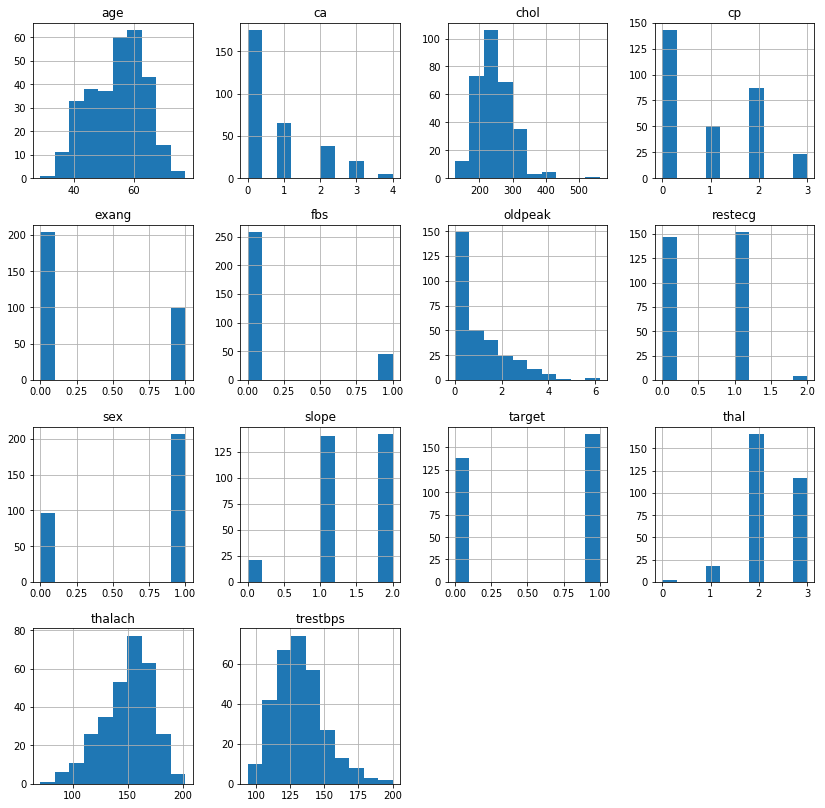

In [10]:
#Now its time for visualization
df.hist(figsize= (14,14))
plt.show()

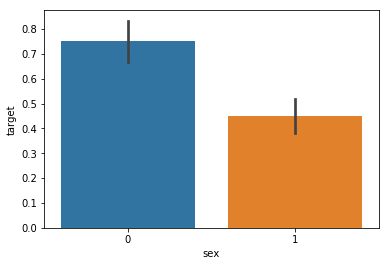

In [11]:
sns.barplot(df['sex'],df['target'])
plt.show()

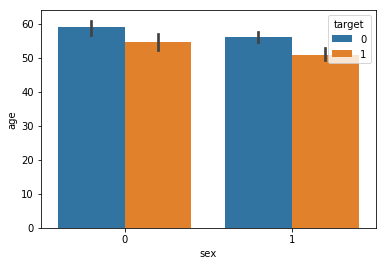

In [12]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [35]:
px.bar(df,df['sex'],df['target'])

In [33]:
numeric_values = ['trestbps','chol','age','oldpeak','thalach']

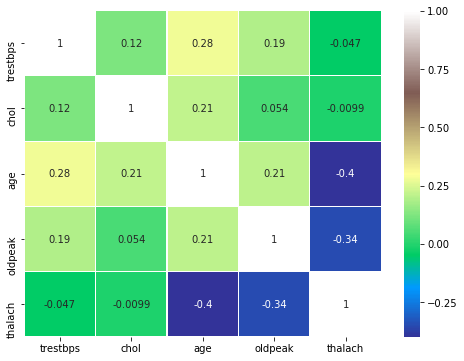

In [34]:
sns.heatmap(df[numeric_values].corr(),annot=True,cmap="terrain",linewidths=0.1)
#to increase the size
plt.gcf().set_size_inches(8,6)

In [16]:
# Time for pre-processing
X,y = df.loc[:,:'thal'],df['target']

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
#splitting data in train test data (70-30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =10,test_size=0.3,shuffle = True)

In [20]:
X_train.shape

(212, 13)

In [21]:
X_test.shape

(91, 13)

In [22]:
y_train.shape

(212,)

In [23]:
y_test.shape

(91,)

In [24]:
#Use Of Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2,max_depth=16)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [25]:
prediction =  dt.predict(X_test)

In [26]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [27]:
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test,prediction)

In [29]:
accuracy_dt

0.7802197802197802

In [30]:
dt.feature_importances_


array([0.0655289 , 0.03461456, 0.33832546, 0.07195982, 0.0799599 ,
       0.        , 0.00971408, 0.08945233, 0.04724994, 0.04559834,
       0.07645805, 0.12741664, 0.01372198])

Text(0.5, 0, 'Feature')

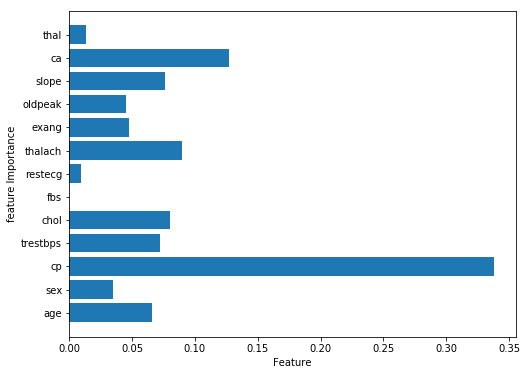

In [31]:
plt.figure(figsize=(8,6))
n_feature = 13
plt.barh(range(n_feature),dt.feature_importances_,align = 'center')
plt.yticks(np.arange(n_feature),X)
plt.ylabel("feature Importance")
plt.xlabel("Feature")
#plt.ylim(-1)

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now its time to test the model on our Custom Data i.e. the data provided by us.

In [62]:
result_category = ["You have no Risk of Heart Disease","Yes, You have heart Disease"]

In [58]:
age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mgdl,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercis_induced_angina,oldpeak,slope,ca,thal = 63,1,3,145,233,1,0,150,0,2.3,0,0,1
customData =np.array([[age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mgdl,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercis_induced_angina,oldpeak,slope,ca,thal]])
customData_pred = dt.predict(customData)

In [65]:
result_data = result_category[int(customData_pred)]
result_data

'Yes, You have heart Disease'